This Killed or Seriously Injured (KSI) dataset is a subset from all traffic collision events.
The source of the data comes from police reports where an officer attended an event related to
a traffic collision. Please note that this dataset does not include all traffic collision events. The
KSI data only includes events where a person sustained a major or fatal injury in a traffic collision
event. The definitions included in Appendix B relate to the severity of injury used to classify the
events in this dataset. Other injury types including minor or none are associated to every
individual included in the event.
The KSI data includes a record (row) for every person involved in the collision event
regardless of their level of injury, it includes everyone who was involved in a particular collision
event. The field “Index” provides an arbitrary unique identification for every record in the entire
dataset. The “ACCNUM” is a unique identification for each traffic collision event. Since the data
includes every person involved in a collision event, this identification is duplicated. Please note
hat this number is not unique and it may repeat year over year. Careful consideration must be
made when creating a subset for unique events, as the detailed information provided is for
every person involved and its associated role and information may be lost.
For example, the event with ACCNUM=6000607400 has 5 persons involved in the
collision (5 records). The field “INVTYPE” indicates the role of the person in the collision event.
The “INVAGE” indicates the age range of the person and the “INJURY” type indicates the level of
injury they sustained. Therefore, this event can be interpreted in the following way:
1. Passenger 1 age 20 to 24 sustained a fatal injury.
2. Passenger 2 age 15-19 sustained a fatal injury.
3. Passenger 3 age 20 to 24 sustained a major injury
4. Driver age 1 20 to 24 sustained a major injury.
5. Driver 2 age 45 to 49 sustained a major injury.

Synopsis: “IMPACTYPE” indicates this was a rear-end type of collision. “MANOUVER”, “DRIVACT”
and “DRIVCON” indicates Driver 2 stopped, was driving properly and in normal condition.
However, Driver 1 was changing lanes, sped too fast for conditions and had been drinking.
There are thirteen categories related to the type of event. Each record is flagged with a “Yes” if
this collision is considered to fall under this criteria. Definitions for those categories are provided
below.

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [113]:
df = pd.read_csv('../data/raw/KSI.csv')

df[df.ACCNUM==6000607400]    #case 6000607400


,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
12816,-8.851369e+06,5.425199e+06,80503019,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12817
12817,-8.851369e+06,5.425199e+06,80503077,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12818
12818,-8.851369e+06,5.425199e+06,80503078,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12819
12819,-8.851369e+06,5.425199e+06,80503079,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12820
12820,-8.851369e+06,5.425199e+06,80503080,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12821
12821,-8.851369e+06,5.425199e+06,80503081,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12822


In [114]:
df.info() # there are many missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17488 entries, 0 to 17487
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  17488 non-null  float64
 1   Y                  17488 non-null  float64
 2   INDEX_             17488 non-null  int64  
 3   ACCNUM             17488 non-null  int64  
 4   YEAR               17488 non-null  int64  
 5   DATE               17488 non-null  object 
 6   TIME               17488 non-null  int64  
 7   STREET1            17488 non-null  object 
 8   STREET2            15896 non-null  object 
 9   OFFSET             3028 non-null   object 
 10  ROAD_CLASS         17112 non-null  object 
 11  DISTRICT           17453 non-null  object 
 12  WARDNUM            16963 non-null  float64
 13  LATITUDE           17488 non-null  float64
 14  LONGITUDE          17488 non-null  float64
 15  LOCCOORD           17393 non-null  object 
 16  ACCLOC             120

In [115]:
df.describe()

,X,Y,INDEX_,ACCNUM,YEAR,TIME,WARDNUM,LATITUDE,LONGITUDE,FATAL_NO,ObjectId
count,1.748800e+04,1.748800e+04,1.748800e+04,1.748800e+04,17488.000000,17488.000000,1.696300e+04,17488.000000,17488.000000,773.000000,17488.000000
mean,-8.838301e+06,5.420763e+06,3.643356e+07,2.220023e+09,2012.569190,1359.008978,2.571596e+03,43.710556,-79.395806,29.399741,8744.500000
std,1.160273e+04,8.655506e+03,3.695031e+07,3.215482e+09,4.479842,629.161368,1.864758e+05,0.056196,0.104229,17.974056,5048.495089
min,-8.865305e+06,5.402162e+06,3.363207e+06,2.530100e+04,2006.000000,0.000000,1.000000e+00,43.589678,-79.638390,1.000000,1.000000
25%,-8.846498e+06,5.413284e+06,5.373756e+06,1.073992e+06,2009.000000,920.000000,7.000000e+00,43.662001,-79.469447,14.000000,4372.750000
50%,-8.838366e+06,5.419556e+06,7.517348e+06,1.306974e+06,2012.000000,1445.000000,1.300000e+01,43.702745,-79.396390,28.000000,8744.500000
75%,-8.829649e+06,5.427830e+06,8.072255e+07,5.001557e+09,2016.000000,1848.000000,2.200000e+01,43.756457,-79.318090,43.000000,13116.250000
max,-8.807929e+06,5.443099e+06,8.166694e+07,9.085345e+09,2021.000000,2359.000000,1.716222e+07,43.855445,-79.122974,78.000000,17488.000000


In [116]:
stat_df = pd.concat(dict(null_cnt=df.isnull().sum(), unique_cnt=df.nunique(dropna=False)), axis=1)
stat_df.sort_values(by='null_cnt',ascending=False).head(5)

,null_cnt,unique_cnt
EMERG_VEH,17445,2
DISABILITY,17013,2
CYCCOND,16759,11
CYCACT,16758,12
CYCLISTYPE,16749,23


In [117]:
# for _VEH columns, the values are either yes/null
df['EMERG_VEH'].unique()
df['TRSN_CITY_VEH'].unique()


array([nan, 'Yes'], dtype=object)

In [118]:
def printUnique(df, columns):
    for column in columns:
        print(f'{column}: {pd.unique(df[column])}')

In [119]:
# find out columns with yes/null values
yesno_column_list = stat_df[stat_df.unique_cnt==2].index.to_list()
printUnique(df,yesno_column_list)


# substitude values with No
df[yesno_column_list] = df[yesno_column_list].fillna(value='No')
df[yesno_column_list] = df[yesno_column_list].replace(to_replace= 'Yes', value=1)
df[yesno_column_list] = df[yesno_column_list].replace(to_replace= 'No', value=0)
df[yesno_column_list] = df[yesno_column_list].astype(int)
printUnique(df,yesno_column_list)

PEDESTRIAN: [nan 'Yes']
CYCLIST: [nan 'Yes']
AUTOMOBILE: ['Yes' nan]
MOTORCYCLE: [nan 'Yes']
TRUCK: [nan 'Yes']
TRSN_CITY_VEH: [nan 'Yes']
EMERG_VEH: [nan 'Yes']
PASSENGER: ['Yes' nan]
SPEEDING: ['Yes' nan]
AG_DRIV: ['Yes' nan]
REDLIGHT: [nan 'Yes']
ALCOHOL: ['Yes' nan]
DISABILITY: [nan 'Yes']
PEDESTRIAN: [0 1]
CYCLIST: [0 1]
AUTOMOBILE: [1 0]
MOTORCYCLE: [0 1]
TRUCK: [0 1]
TRSN_CITY_VEH: [0 1]
EMERG_VEH: [0 1]
PASSENGER: [1 0]
SPEEDING: [1 0]
AG_DRIV: [1 0]
REDLIGHT: [0 1]
ALCOHOL: [1 0]
DISABILITY: [0 1]


In [120]:
stat_df = pd.concat(dict(null_cnt=df.isnull().sum(), unique_cnt=df.nunique(dropna=False)), axis=1)
stat_df.sort_values(by='null_cnt',ascending=False)

,null_cnt,unique_cnt
CYCCOND,16759,11
CYCACT,16758,12
CYCLISTYPE,16749,23
FATAL_NO,16715,79
PEDTYPE,14567,17
PEDACT,14531,16
PEDCOND,14530,11
OFFSET,14460,445
DRIVCOND,8669,11
DRIVACT,8666,14


In [121]:
print(df[['CYCCOND','PEDCOND','DRIVCOND','RDSFCOND']].nunique())
print(df[['CYCCOND']].value_counts().sort_index())
print(df[['PEDCOND']].value_counts().sort_index())
print(df[['DRIVCOND']].value_counts().sort_index())
print(df[['RDSFCOND']].value_counts().sort_index())

CYCCOND     10
PEDCOND     10
DRIVCOND    10
RDSFCOND     9
dtype: int64
CYCCOND                           
Ability Impaired, Alcohol               4
Ability Impaired, Alcohol Over .80      1
Ability Impaired, Drugs                 2
Fatigue                                 2
Had Been Drinking                      28
Inattentive                           102
Medical or Physical Disability          3
Normal                                506
Other                                   8
Unknown                                73
dtype: int64
PEDCOND                           
Ability Impaired, Alcohol               39
Ability Impaired, Alcohol Over .80      12
Ability Impaired, Drugs                  9
Fatigue                                  2
Had Been Drinking                      210
Inattentive                            530
Medical or Physical Disability          71
Normal                                1664
Other                                   58
Unknown                              

In [122]:
# check the COND columns, either one of the three columns contains value, so we can group them
print(df[['CYCCOND','PEDCOND','DRIVCOND']].isnull().sum(axis=1).value_counts())

if 'COND' in df.columns:
    df.drop(columns=['COND'],inplace=True)
if 'COND_TYPE' in df.columns:
    df.drop(columns=['COND_TYPE'],inplace=True)

df.loc[(df['CYCCOND'].notna()), 'COND_TYPE'] = 'CYC' 
df.loc[(df['PEDCOND'].notna()), 'COND_TYPE'] = 'PED' 
df.loc[(df['DRIVCOND'].notna()), 'COND_TYPE'] = 'DRIV' 

df.loc[(df['CYCCOND'].notna()), 'COND'] = df['CYCCOND']
df.loc[(df['PEDCOND'].notna()), 'COND'] = df['PEDCOND']
df.loc[(df['DRIVCOND'].notna()), 'COND'] = df['DRIVCOND']



2    12506
3     4982
dtype: int64


In [123]:
stat_df = pd.concat(dict(null_cnt=df.isnull().sum(), unique_cnt=df.nunique(dropna=False)), axis=1)
stat_df.sort_values(by='null_cnt',ascending=False)

,null_cnt,unique_cnt
CYCCOND,16759,11
CYCACT,16758,12
CYCLISTYPE,16749,23
FATAL_NO,16715,79
PEDTYPE,14567,17
PEDACT,14531,16
PEDCOND,14530,11
OFFSET,14460,445
DRIVCOND,8669,11
DRIVACT,8666,14


In [124]:
print(df[['CYCACT','PEDACT','DRIVACT']].nunique())
print(df[['CYCACT']].value_counts().sort_index())
print(df[['PEDACT']].value_counts().sort_index())
print(df[['DRIVACT']].value_counts().sort_index())
# won't be grouped as the categories are different

CYCACT     11
PEDACT     15
DRIVACT    13
dtype: int64
CYCACT                      
Disobeyed Traffic Control        80
Driving Properly                401
Failed to Yield Right of Way     61
Following too Close               4
Improper Lane Change             21
Improper Passing                 20
Improper Turn                    24
Lost control                     37
Other                            69
Speed too Fast For Condition      8
Wrong Way on One Way Road         5
dtype: int64
PEDACT                               
Coming From Behind Parked Vehicle         34
Crossing marked crosswalk without ROW     17
Crossing with right of way               929
Crossing without right of way            412
Crossing, Pedestrian Crossover            58
Crossing, no Traffic Control             681
On Sidewalk or Shoulder                  259
Other                                    220
Person Getting on/off School Bus           2
Person Getting on/off Vehicle             36
Playing or Working 

In [125]:
# FATAL_NO seems to be related to ACCLASS
df[df['FATAL_NO'].isna()].groupby(by=['ACCLASS'],dropna=False)['ACCLASS'].count()


ACCLASS
Fatal                    1669
Non-Fatal Injury        15032
Property Damage Only        7
NaN                         0
Name: ACCLASS, dtype: int64

## Classes

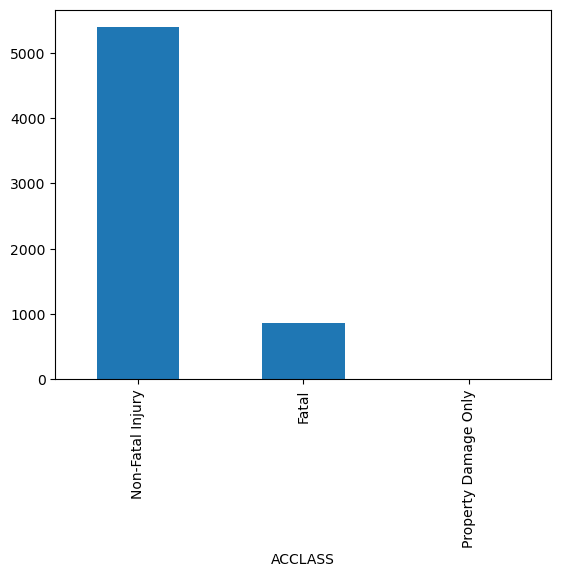

In [126]:
df.groupby(by=['ACCLASS'])['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()

## DateTime visualization

In [127]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH']= df['DATE'].map(lambda x: x.month)
df['DAY'] = df['DATE'].map(lambda x: x.day)
df['HOUR'] = df['TIME'].apply(lambda x: int(x/100))

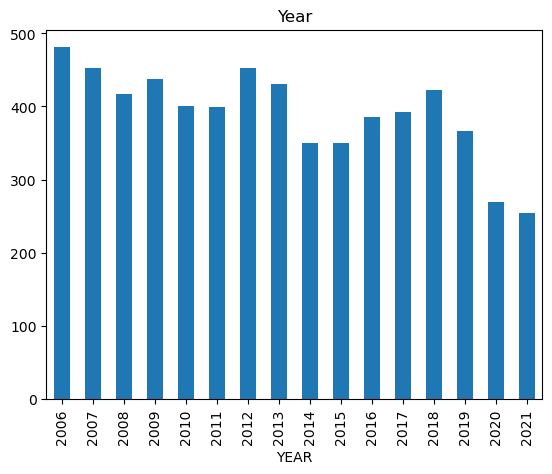

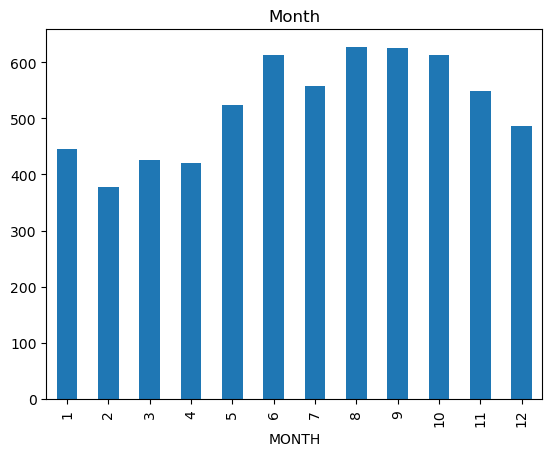

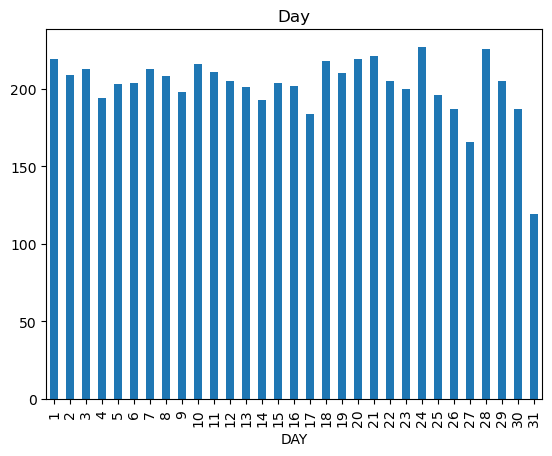

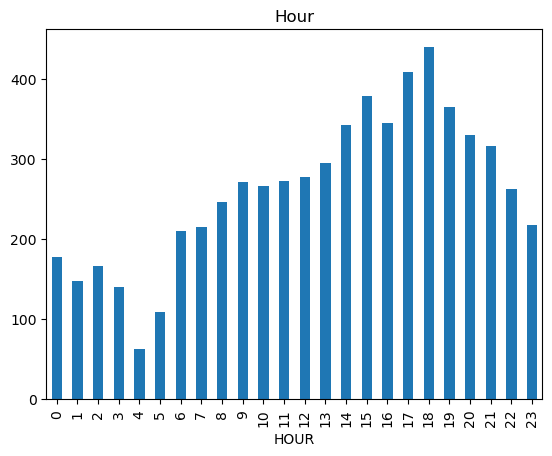

In [128]:

df.groupby(by=['YEAR'])['ACCNUM'].nunique().plot(kind='bar',title='Year')
plt.show()
df.groupby(by=['MONTH'])['ACCNUM'].nunique().plot(kind='bar',title='Month')
plt.show()
df.groupby(by=['DAY'])['ACCNUM'].nunique().plot(kind='bar',title='Day')
plt.show()
df.groupby(by=['HOUR'])['ACCNUM'].nunique().plot(kind='bar', title='Hour')
plt.show()



## Accident Information

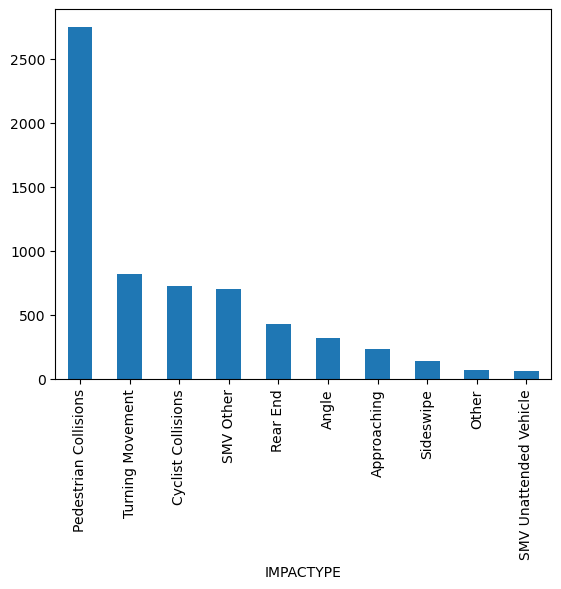

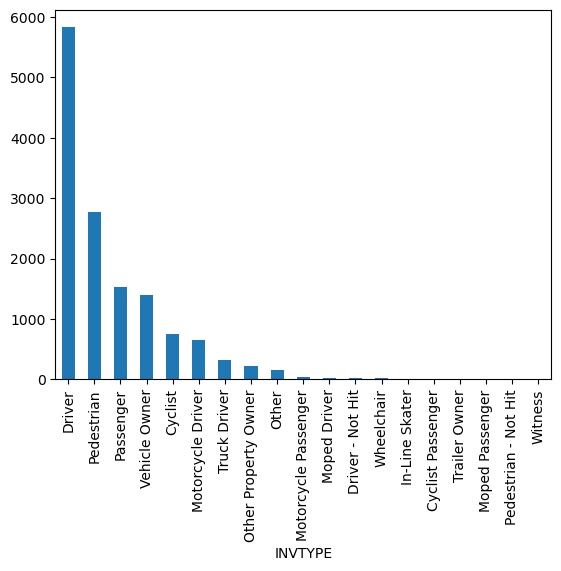

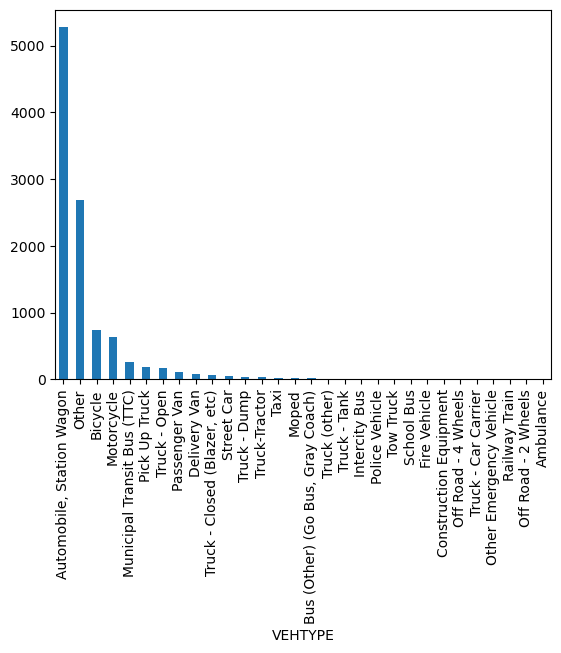

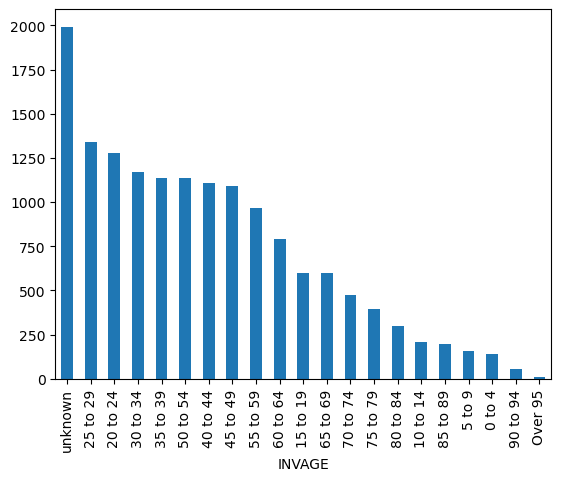

In [129]:
df.groupby(by=['IMPACTYPE'])['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()
df.groupby(by=['INVTYPE'])['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()
df.groupby(by=['VEHTYPE'])['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()
df.groupby(by=['INVAGE'])['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()

## Location visualization

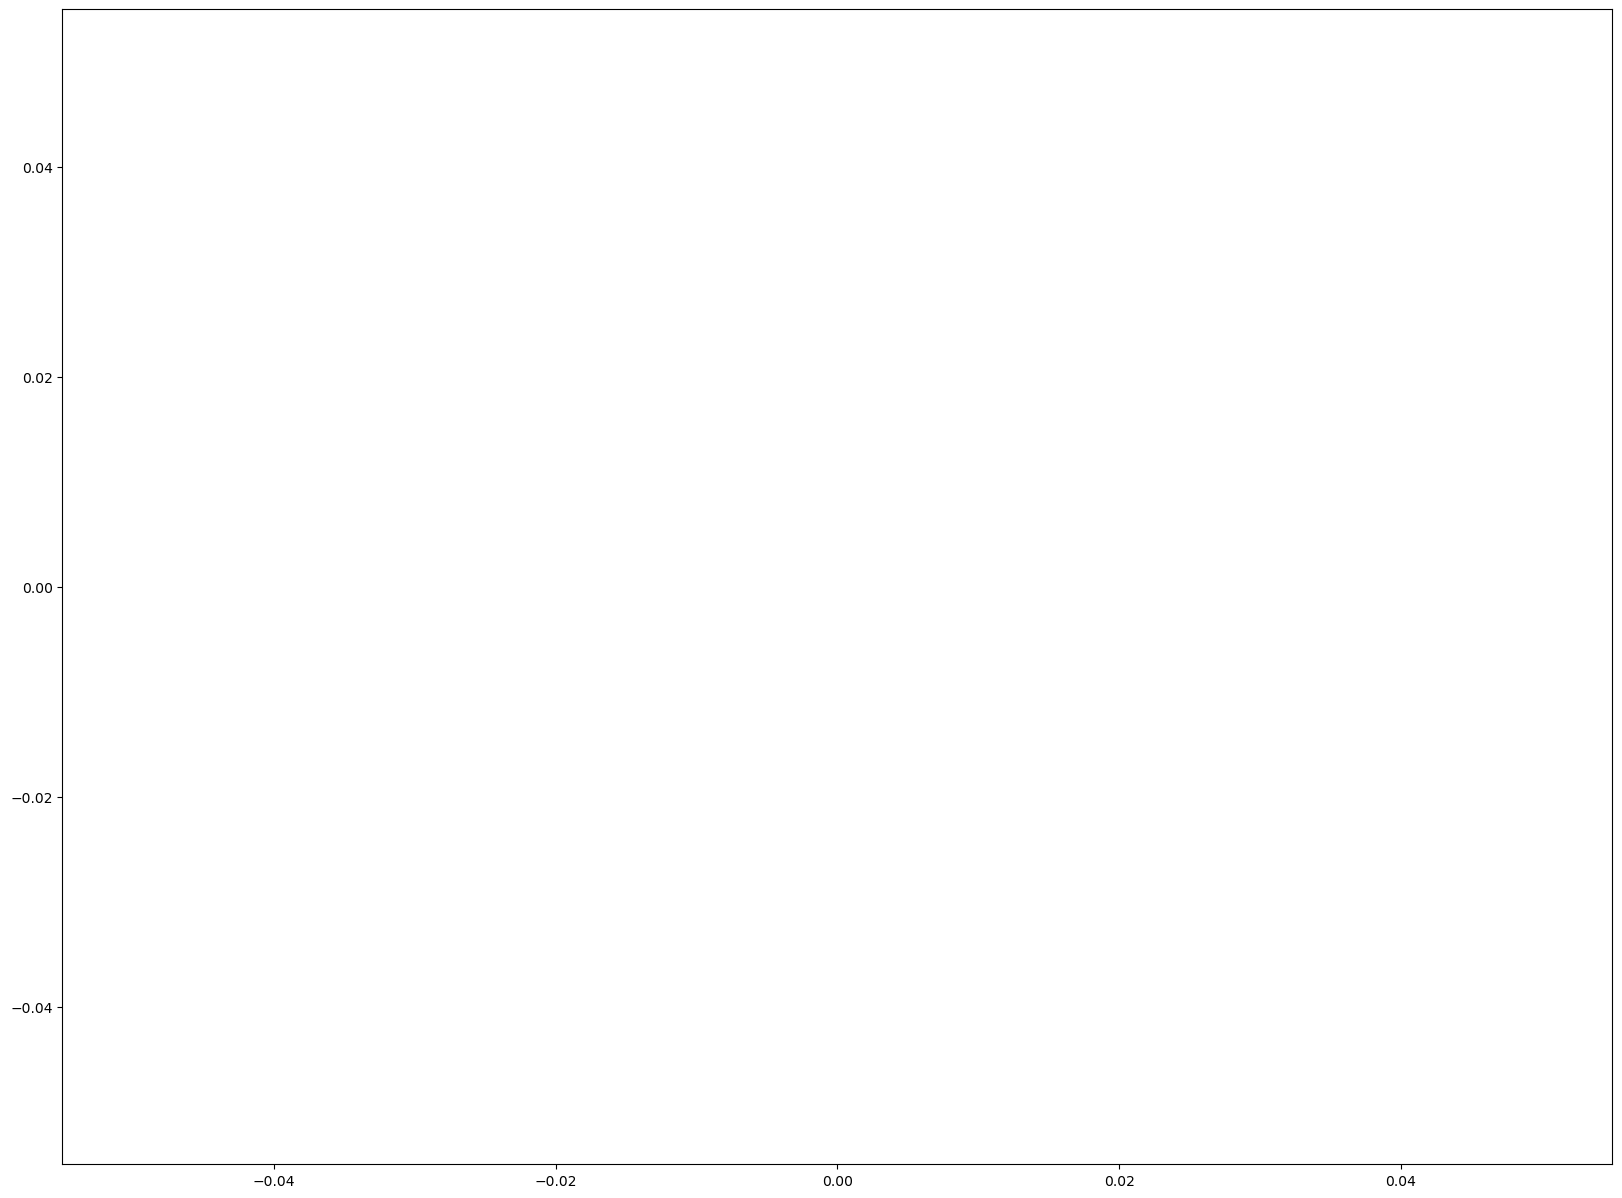

In [130]:
plt.figure(figsize=(20,15))
plt.scatter( x=df['LONGITUDE'],y=df['LATITUDE'], c=df['ACCLASS'].map({1:'red',0:'blue'}), alpha=0.1)

In [131]:
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Old East York'), 'DISTRICT'] = 'Toronto and East York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Willowdale West'),'DISTRICT'] = 'North York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Glenfield-Jane Heights'),'DISTRICT'] = 'North York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Wychwood'),'DISTRICT'] = 'Toronto and East York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Rockcliffe-Smythe'),'DISTRICT'] = 'Etobicoke York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='NSA'),'DISTRICT'] = 'North York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Weston-Pelham Park'),'DISTRICT'] = 'Etobicoke York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Etobicoke City Centre'),'DISTRICT'] = 'Etobicoke York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Mimico-Queensway'),'DISTRICT'] = 'Etobicoke York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Old East York'),'DISTRICT'] = 'Etobicoke York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Downsview'),'DISTRICT'] = 'North York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Milliken'),'DISTRICT'] = 'Scarborough'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='South Riverdale'),'DISTRICT'] = 'Toronto and East York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='Thorncliffe Park'),'DISTRICT'] = 'Toronto and East York'
df.loc[(df['DISTRICT'].isna()) & (df['NEIGHBOURHOOD_158'] =='North Riverdale'),'DISTRICT'] = 'Toronto and East York'

<AxesSubplot:xlabel='District', ylabel='Frequency'>

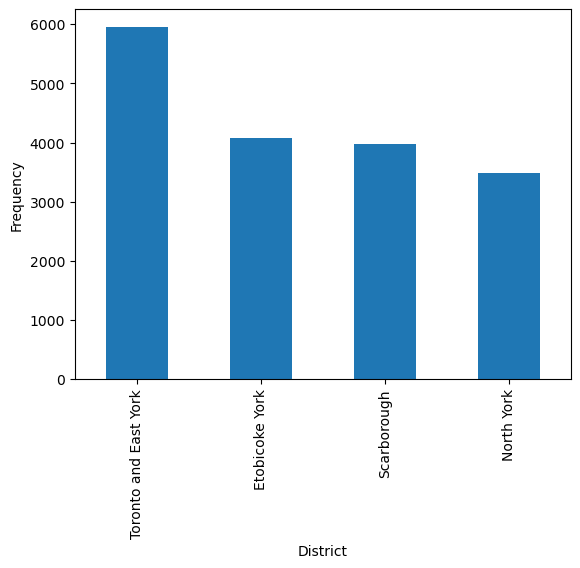

In [132]:
df['DISTRICT'].value_counts().plot(kind='bar', xlabel='District', ylabel='Frequency')

<AxesSubplot:xlabel='ACCLOC'>

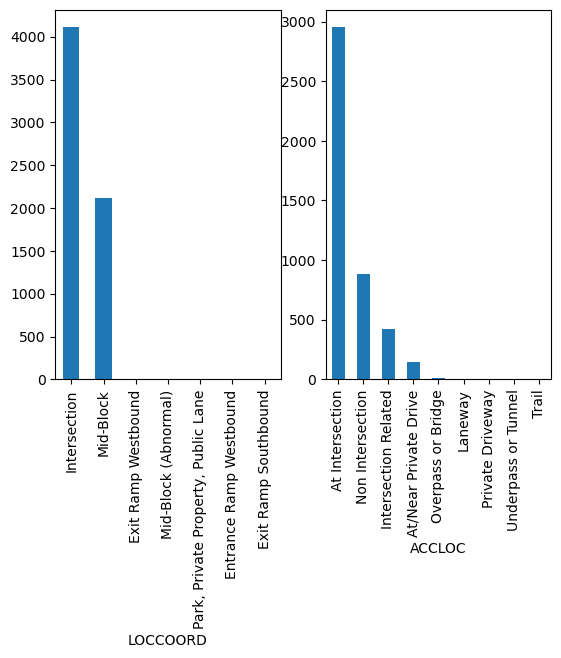

In [133]:
fig, axs = plt.subplots(nrows=1,ncols=2)
df.groupby('LOCCOORD')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar', ax=axs[0])
df.groupby('ACCLOC')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar', ax=axs[1])


## Environment visualization

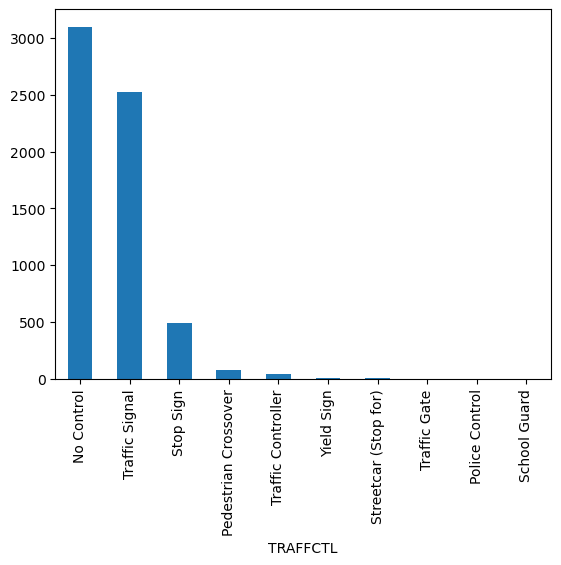

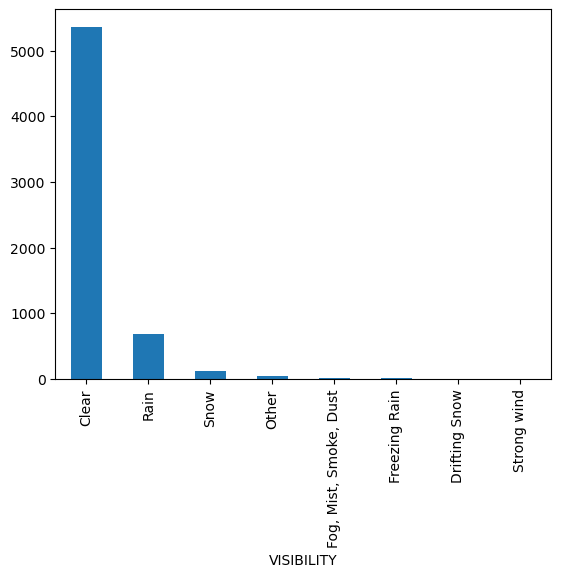

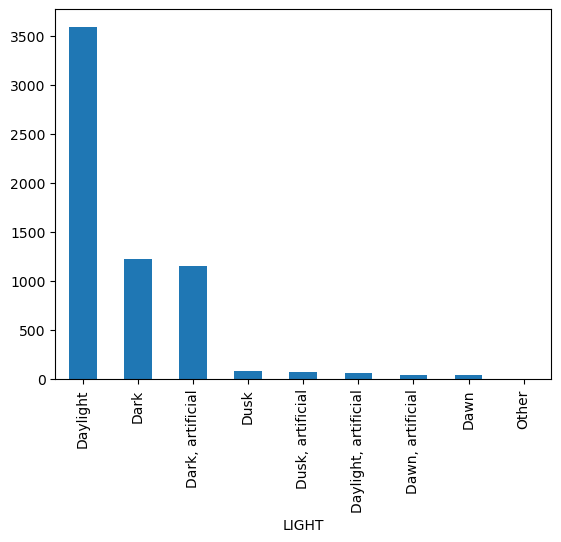

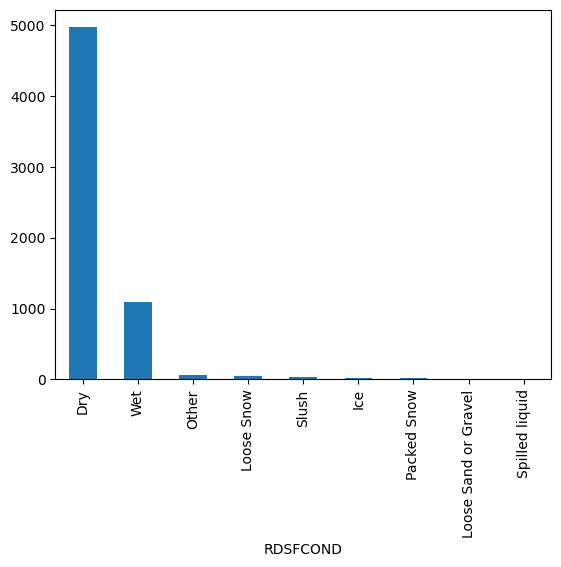

In [134]:
df.groupby('TRAFFCTL')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()
df.groupby('VISIBILITY')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()
df.groupby('LIGHT')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()
df.groupby('RDSFCOND')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()


<AxesSubplot:xlabel='ROAD_CLASS'>

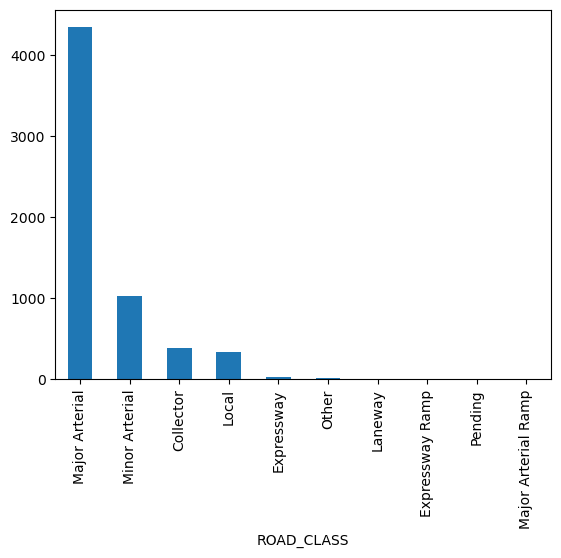

In [135]:
df.groupby('ROAD_CLASS')['ACCNUM'].nunique().sort_values(ascending=False).plot(kind='bar')


## Person involved visualization

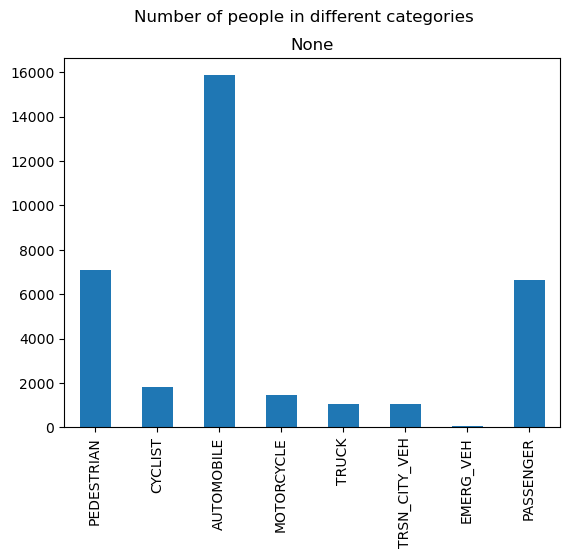

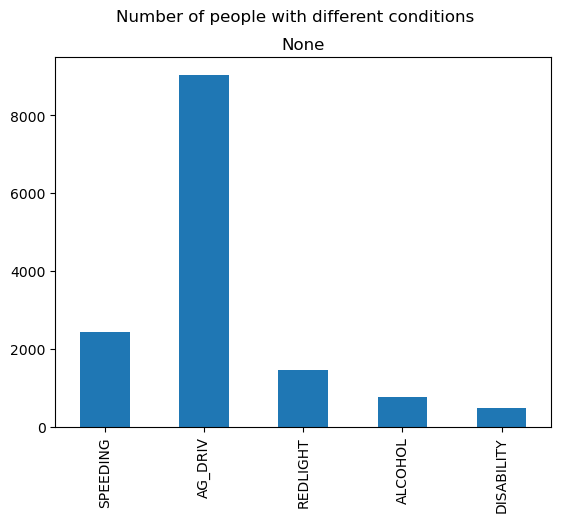

In [136]:
df[['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER']].sum().plot(kind='bar',subplots=True, title='Number of people in different categories')
plt.show()
df[['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']].sum().plot(kind='bar',subplots=True, title='Number of people with different conditions')
plt.show()

In [137]:
df['CNT'] = df.groupby(by='ACCNUM')['ACCNUM'].transform('count')

## Drop columns

In [178]:
# cyclist columns -> to many null values
col2drop = []
col2drop.append('CYCCOND')
col2drop.append('CYCACT')
col2drop.append('CYCLISTYPE')


# pedestrian columns -> to many null values
col2drop.append('PEDCOND')
col2drop.append('PEDACT')
col2drop.append('PEDTYPE')

# driver columns -> to many null values
col2drop.append('DRIVCOND')
col2drop.append('DRIVACT')
col2drop.append('MANOEUVER')

# the combined columns still contains lots of null values -> drop them
col2drop.append('COND')
col2drop.append('COND_TYPE')

# we have coordinate information, we can deduce street name from coordinates
col2drop.append('STREET1')
col2drop.append('STREET2')
col2drop.append('OFFSET')
col2drop.append('DIVISION')
col2drop.append('HOOD_158')
col2drop.append('NEIGHBOURHOOD_158')
col2drop.append('HOOD_140')
col2drop.append('NEIGHBOURHOOD_140')
col2drop.append('WARDNUM')
col2drop.append('INITDIR')

# if we are only need to determine if it is fatal or not, we don't care the injury level
col2drop.append('INJURY')

# drop X, Y as lat long provide
col2drop.append('X')
col2drop.append('Y')

# ids
col2drop.append('INDEX_')
col2drop.append('INDEX_')
col2drop.append('ACCNUM')
col2drop.append('FATAL_NO')

# old date and time
col2drop.append('DATE')
col2drop.append('TIME')


new_df = df[[x for x in df.columns if x not in col2drop]].copy()

In [179]:
new_df.ACCLASS.isnull().sum()

7

In [180]:
new_df['ACCLOC'].fillna('Unknown',inplace=True)
new_df['IMPACTYPE'].fillna('Unknown',inplace=True)
new_df['INVTYPE'].fillna('Unknown',inplace=True)
new_df['LOCCOORD'].fillna('Unknown',inplace=True)
new_df['RDSFCOND'].fillna('Unknown',inplace=True)
new_df['ROAD_CLASS'].fillna('Unknown',inplace=True)
new_df['TRAFFCTL'].fillna('Unknown',inplace=True)
new_df['VEHTYPE'].fillna('Unknown',inplace=True)
new_df['VISIBILITY'].fillna('Unknown',inplace=True)
new_df.dropna(subset=['ACCLASS'],inplace=True)

In [181]:
# update ACCLASS to change it to fatal (1)/ non fatal (0)
new_df.loc[(new_df['ACCLASS'] =='Non-Fatal Injury'),'ACCLASS'] = 0
new_df.loc[(new_df['ACCLASS'] =='Property Damage Only'),'ACCLASS'] = 0
new_df.loc[(new_df['ACCLASS']=='Fatal') ,'ACCLASS'] = 1
new_df['ACCLASS'] = new_df['ACCLASS'].astype(int)


In [182]:
new_df.isna().any().sum()

0

In [183]:
correlation_table = new_df.corr()

<AxesSubplot:>

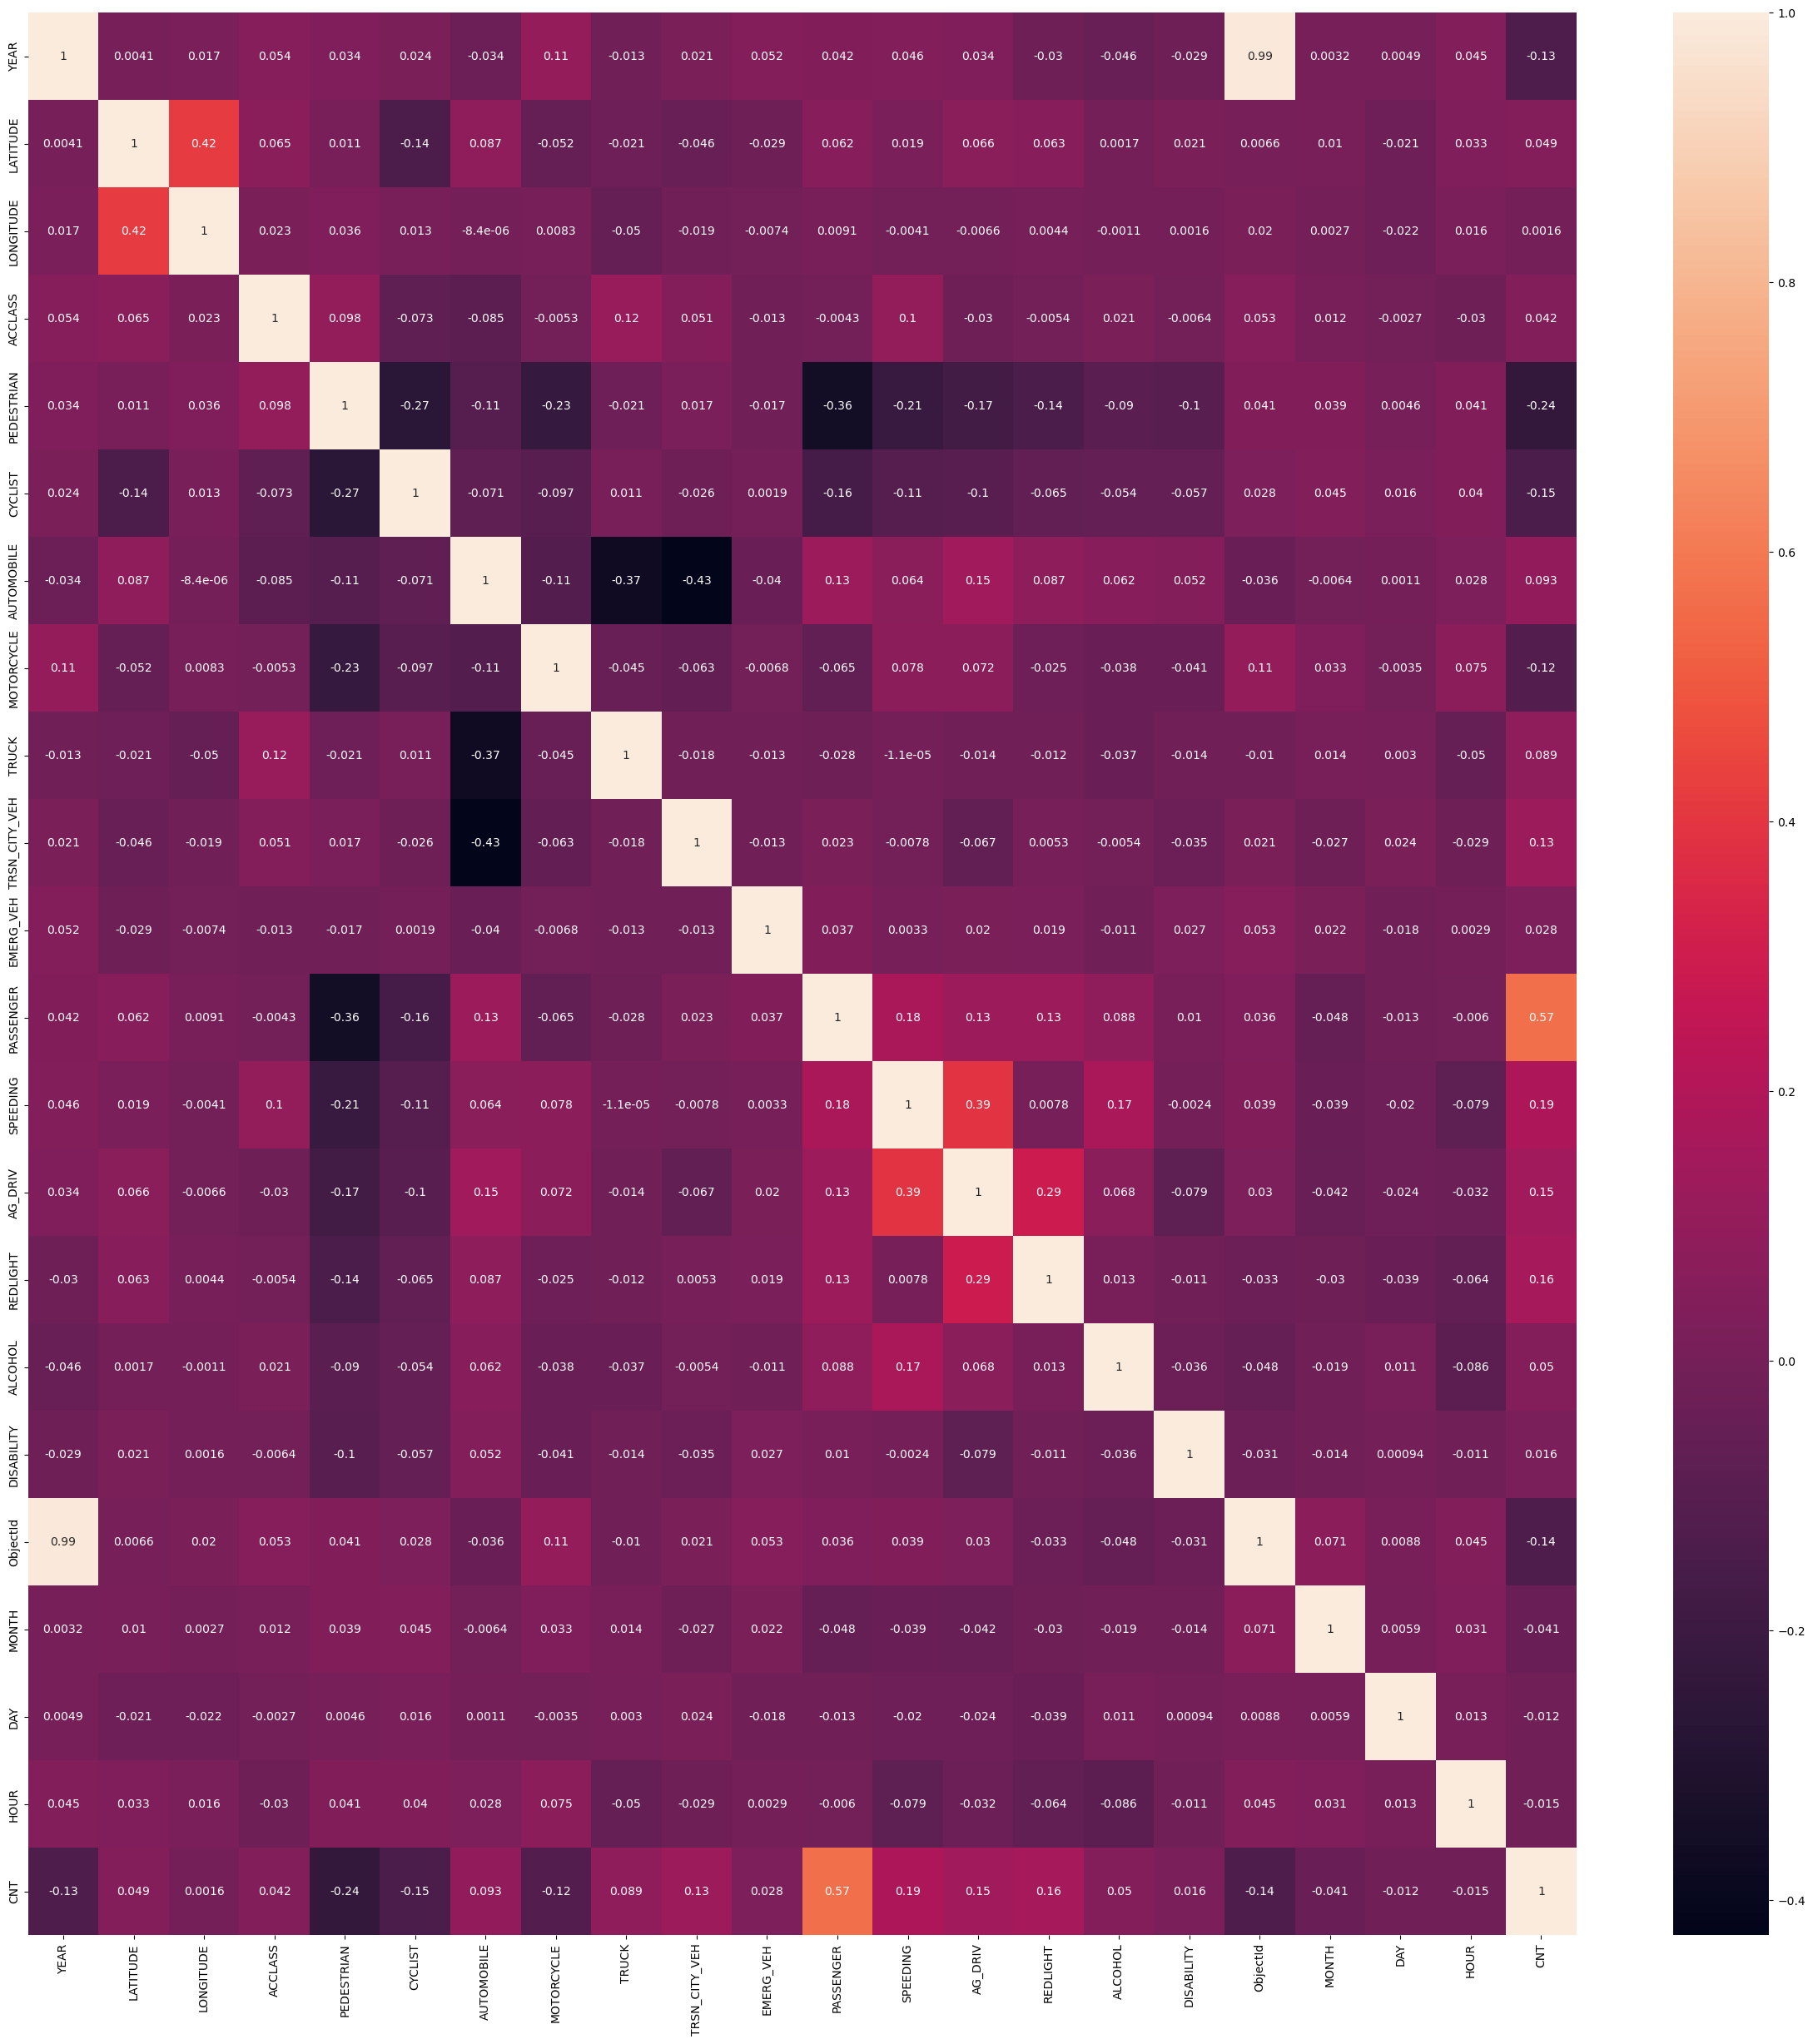

In [184]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation_table,annot=True)


In [230]:
columns= [x for x in new_df.columns if x not in ['ACCLASS', 'ObjectId']]
x = new_df[columns]
y = new_df['ACCLASS']

In [233]:
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [206]:
new_df['INVTYPE'].value_counts()

Driver                  7919
Pedestrian              2985
Passenger               2654
Vehicle Owner           1636
Cyclist                  749
Motorcycle Driver        652
Truck Driver             325
Other Property Owner     257
Other                    180
Motorcycle Passenger      37
Moped Driver              28
Driver - Not Hit          17
Wheelchair                16
Unknown                   14
In-Line Skater             5
Trailer Owner              2
Cyclist Passenger          2
Pedestrian - Not Hit       1
Witness                    1
Moped Passenger            1
Name: INVTYPE, dtype: int64

In [241]:
cat_features = x.select_dtypes(include=['object']).columns
numeric_features = x.columns.drop(cat_features).copy()

transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), cat_features),
    ('num_scalar', StandardScaler(), numeric_features)
])
clf_tree = DecisionTreeClassifier(criterion='entropy')

data_pipeline = Pipeline(steps=[
    ('cat_trans', transformer),
    ('decision_tree', clf_tree)
])


In [242]:
cat_features.sort_values()

Index(['ACCLOC', 'DISTRICT', 'IMPACTYPE', 'INVAGE', 'INVTYPE', 'LIGHT',
       'LOCCOORD', 'RDSFCOND', 'ROAD_CLASS', 'TRAFFCTL', 'VEHTYPE',
       'VISIBILITY'],
      dtype='object')

In [243]:
numeric_features.sort_values()

Index(['AG_DRIV', 'ALCOHOL', 'AUTOMOBILE', 'CNT', 'CYCLIST', 'DAY',
       'DISABILITY', 'EMERG_VEH', 'HOUR', 'LATITUDE', 'LONGITUDE', 'MONTH',
       'MOTORCYCLE', 'PASSENGER', 'PEDESTRIAN', 'REDLIGHT', 'SPEEDING',
       'TRSN_CITY_VEH', 'TRUCK', 'YEAR'],
      dtype='object')

In [244]:

X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=35, train_size=0.8)


In [245]:

kfolds = KFold(n_splits=10, random_state=35, shuffle=True)
scores = cross_val_score(estimator=data_pipeline,
                         X=X_train, y=y_train, cv=kfolds)

print(scores)

c:\Users\yvonn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\yvonn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\yvonn\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 108, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "c:\Users\yvonn\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\yvonn\anaconda3\lib\site-packages\sklearn\pipeline.py", line 695, in score
    Xt = transform.transform(Xt)
  File "c:\Users\yvonn\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 763, in transform
    Xs = self._fit_transform(
  File "c:\Users\yvonn\a

[       nan 0.95067906 0.94996426        nan 0.93991416 0.94921316
 0.95207439        nan        nan 0.94563662]
